# <center>Development JN</center>
This jupyter-notebook is used to develop components of ExoCcycle classes, functions, and methods.



<center>Figure 1: ....</center>
<br>
<br>


# Show edge weight changing as a function of normalized distance and node point property distance

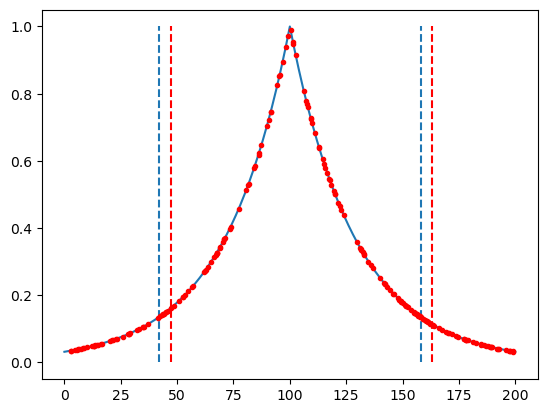

In [196]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import copy as cp
import os

# Define data
shift1 = 0
valueMax = 200
V1 = np.linspace(0,valueMax,201)+shift1
V1 = np.linspace(0,valueMax,201)+shift1
Vdata = np.random.rand(1, 201)*valueMax
V2 = valueMax/2
L = 1

# propetry range
Vrange = np.max(V1)-np.min(V1);
Vrangedata = np.max(Vdata)-np.min(Vdata);

# Calculate std
std = np.std(V1);
stddata = np.std(Vdata);

# Calculate Aij (edge weight)
stretch = 0.5
S     = ( np.exp( (np.abs(Vrange) - np.abs(V2-V1))/(stretch*std) ) )            / np.exp( (np.abs(Vrange)/(stretch*std) ) )
Sdata = ( np.exp( (np.abs(Vrangedata) - np.abs(V2-Vdata))/(stretch*stddata) ) ) / np.exp( (np.abs(Vrangedata)/(stretch*stddata) ) )

Aij = S/( L );
Aijdata = Sdata/( L );


# Change Aij (edge weight) to 1, when V2-V1 = 0.
#Aij[np.isinf(Aij)] = Vrange*10;

plt.plot(V1, Aij);
plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
           ymin=0, ymax = 1, linestyles='--');

plt.plot(Vdata, Aijdata, '.r');
plt.vlines([np.mean(Vdata)-stddata, np.mean(Vdata)+stddata],
           ymin=0, ymax = 1, linestyles='--', colors='r');



/tmp/ipykernel_7847/1683213277.py:65: RuntimeWarning: divide by zero encountered in divide
  propertyInv = 1/np.abs((V2-V1)/Vrange)


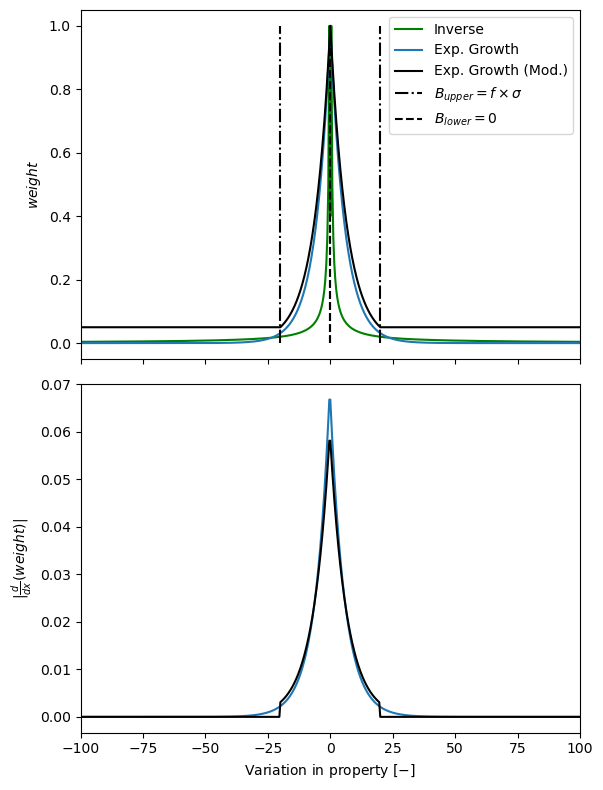

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import copy as cp
import os

# Define data
shift1 = 0
valueMax = 200
V1 = np.linspace(0,valueMax,501)+shift1
V1 = np.linspace(0,valueMax,501)+shift1
Vdata = np.random.rand(1, 201)*valueMax
V2 = valueMax/2
L = 1

# propetry range
Vrange = np.max(V1)-np.min(V1);
Vrangedata = np.max(Vdata)-np.min(Vdata);


# Calculate std
std = np.std(V1);
stddata = np.std(Vdata);


# Calculate normal distribution using V1 properties
Vdata = np.random.normal(loc=V2, scale=std, size=201)
Vrangedata = np.max(Vdata)-np.min(Vdata);
stddata = np.std(Vdata);

# Calculate Aij (edge weight)
stdNew = 10;
factor = 2;
lowerbound = stdNew/factor;
lowerbound = 0;
upperbound = stdNew*factor;
stretch = 0.1


S     = ( np.exp( (np.abs(Vrange) - np.abs(V2-V1))/(stretch*std) ) )            / np.exp( (np.abs(Vrange)/(stretch*std) ) )
#Snew  = ( np.exp( (np.abs(Vrange) - (lowerbound+np.abs(V2-V1)))/(stretch*std) ) )            / np.exp( ((np.abs(Vrange)- (lowerbound))/(stretch*std) ) )
Sdata = ( np.exp( (np.abs(Vrangedata) - np.abs(V2-Vdata))/(stretch*stddata) ) ) / np.exp( (np.abs(Vrangedata)/(stretch*stddata) ) )

S_at_upperbound = .05
stretch = (lowerbound-upperbound)/np.log(S_at_upperbound)/stdNew
Snew  = ( np.exp( (np.abs(Vrange) - (0+np.abs(V2-V1)))/(stretch*stdNew) ) );
Snew[np.abs(V2-V1)<=lowerbound] = np.exp( ((np.abs(Vrange)- (lowerbound))/(stretch*stdNew) ) )
Snew /= np.exp( ((np.abs(Vrange)- (lowerbound))/(stretch*stdNew) ) )
Snew[Snew<=S_at_upperbound] = S_at_upperbound

#Snew  = ( np.exp( (np.abs(Vrange) - (lowerbound+np.abs(V2-V1)))/(stretch*stdNew) ) );
#Snew[np.abs(V2-V1)<=lowerbound] = np.exp( ((np.abs(Vrange)- (lowerbound))/(stretch*stdNew) ) )
#Snew /= np.exp( ((np.abs(Vrange)- (lowerbound))/(stretch*stdNew) ) )


Aij = S/( L );
Aijnew = Snew/( L );
Aijdata = Sdata/( L );



# Change Aij (edge weight) to 1, when V2-V1 = 0.
propertyInv = 1/np.abs((V2-V1)/Vrange)
propertyInv[np.isinf(propertyInv)] = Vrange;
propertyInv /= Vrange;

AijInv = propertyInv/L
InvNorm = np.max(AijInv)

# Figure
fig, axes = plt.subplots(2, 1, figsize=(6,8), sharex=True)

plt.sca(axes[0])
plt.plot(V1-V2, AijInv/InvNorm, '-g', label='Inverse');
#plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
#           ymin=0, ymax = 1, linestyles='--', colors='r');

# Figure 
#plt.figure()
plt.plot(V1-V2, Aij, label='Exp. Growth');
#plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
#           ymin=0, ymax = 1, linestyles='--');

plt.plot(V1-V2, Aijnew, '-k', label='Exp. Growth (Mod.)');
plt.vlines([-upperbound, +upperbound],
           ymin=0, ymax = 1, linestyles=['-.'], colors=["k"],
           label=r"$B_{upper}=f\times\sigma$");
plt.vlines([-lowerbound, +lowerbound],
           ymin=0, ymax = 1, linestyles=['--'], colors=["k"],
           label=r"$B_{lower}=0$");
#plt.hlines([S_at_upperbound],
#           xmin=V2-upperbound, xmax = V2-upperbound, linestyles='.');
plt.ylabel(r'$weight$')
plt.legend()

#plt.figure()
plt.sca(axes[1])
plt.plot(V1[:-1]-V2, np.abs(np.diff(Aij)));
plt.plot(V1[:-1]-V2, np.abs(np.diff(Aijnew)), '-k');
plt.ylabel(r'$|\frac{d}{dx}\left(weight\right)|$')
plt.xlabel(r'Variation in property $[-]$')


plt.tight_layout()
plt.xlim([np.min(V1)-V2, np.max(V1)-V2])


plt.savefig("figures/EdgeWeightDescription/Exponential-Edge-Weight-decay", dpi=600)
plt.savefig("figures/EdgeWeightDescription/Exponential-Edge-Weight-decay.svg", dpi=600)
#plt.plot(Vdata, Aijdata, '.r');
#plt.vlines([np.mean(Vdata)-stddata, np.mean(Vdata)+stddata],
#           ymin=0, ymax = 1, linestyles='--', colors='r');

# Figure
# plt.figure()

# AijMerged = cp.deepcopy(Aij)
# AijMerged[ AijMerged < AijInv/np.max(AijInv) ] = AijInv[ AijMerged < AijInv/np.max(AijInv) ]/InvNorm


# plt.plot(V1, AijMerged);
# plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
#            ymin=0, ymax = 1, linestyles='--');

# plt.figure()
# plt.plot(Vdata, Aijdata, '.r');
# plt.vlines([np.mean(Vdata)-stddata, np.mean(Vdata)+stddata],
#            ymin=0, ymax = 1, linestyles='--', colors='r');

# Figure
#plt.figure()
#plt.hist(Vdata)
#plt.hist(V1)


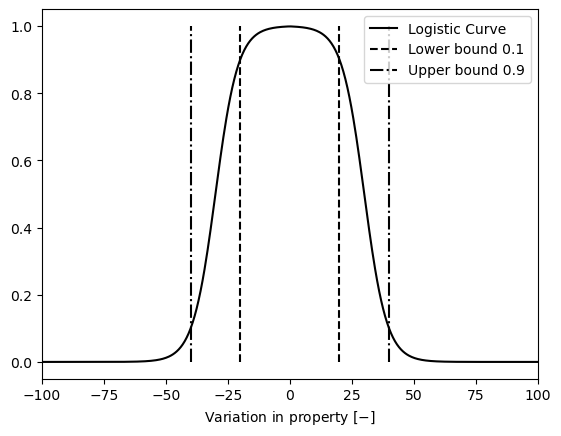

In [133]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import copy as cp
import os

# Define data
shift1 = 0
valueMax = 200
V1 = np.linspace(0,valueMax,501)+shift1
V1 = np.linspace(0,valueMax,501)+shift1
V2 = valueMax/2
L = 1

# propetry range
Vrange = np.max(V1)-np.min(V1);

# Calculate std
std = np.std(V1);

# Calculate Aij (edge weight)
stdNew = 10;
lowerbound = stdNew/factor;
lowerbound = 0;
upperbound = stdNew*factor;


# Logistic curve
diff = np.abs(V1-V2)
maxDiff = np.max(diff); # This will be hard to constuct if all data isn't know from the start.

similar = (maxDiff-diff)/maxDiff

# Find k and shift such that Snlogistic=1 at lowerbound and Snlogistic=.1 at upperbound.
stdNew = 20;
S_at_lower = 0.1;
S_at_upper = 0.9;
lowerbound = stdNew;
upperbound = stdNew*factor;

#shift = ((1 - lowerbound/upperbound)**(-1) ) * ((lowerbound/upperbound)*np.log(S_at_lower) - np.log(S_at_upper))             
#k     = (np.log(S_at_lower) + S)/upperbound
xl = np.log( (L-S_at_upper)/S_at_upper )
xu = np.log( (L-S_at_lower)/S_at_lower )
k = -1*(xl-xu)/(lowerbound-upperbound)
shift = k*lowerbound + xl

Snlogistic = L*(1+np.exp(-k*diff+shift))**(-1)

# Plot
plt.plot(V1-V2, Snlogistic, 'k', label="Logistic Curve")
plt.vlines([-lowerbound, +lowerbound],
           ymin=0, ymax = 1, linestyles='--', colors='k', label="Lower bound {}".format(S_at_lower));

plt.vlines([-upperbound, +upperbound],
           ymin=0, ymax = 1, linestyles='-.', colors='k', label="Upper bound {}".format(S_at_upper));


plt.legend()
plt.xlabel(r'Variation in property $[-]$')
plt.xlim([np.min(V1-V2), np.max(V1-V2)])
plt.xlim([np.min(V1-V2), np.max(V1-V2)])


plt.savefig("figures/EdgeWeightDescription/Logistic-Edge-Weight-decay", dpi=600)
plt.savefig("figures/EdgeWeightDescription/Logistic-Edge-Weight-decay.svg", dpi=600)



/tmp/ipykernel_7361/2515513116.py:51: RuntimeWarning: divide by zero encountered in divide
  SInv     = 1/np.abs((V2-V1))    * (breakPointWeight*breakPointDiff)


(18.621319522010793, 19.382754416100738, 6.367771462163135, 6.538544340625556)

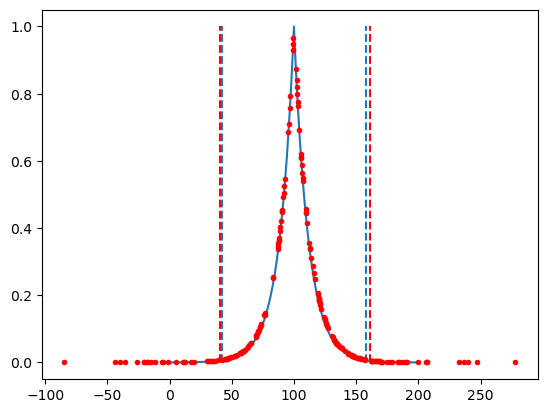

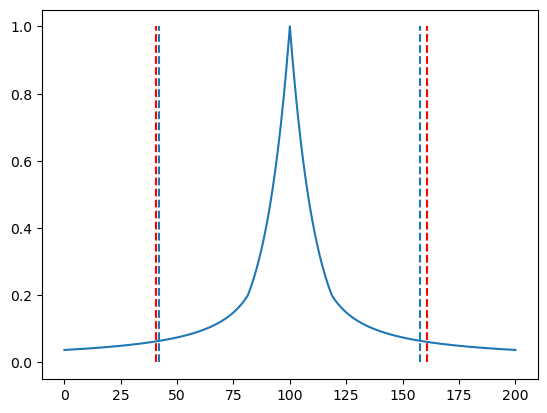

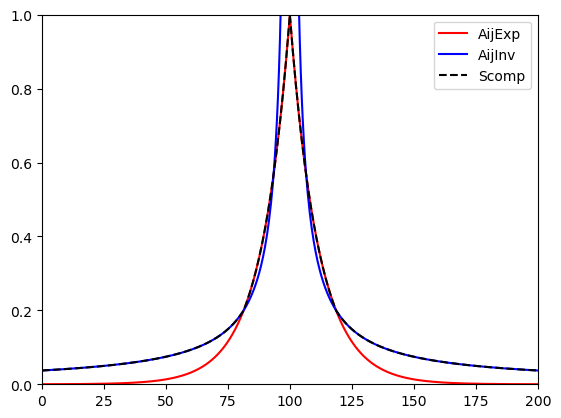

In [327]:
# Create a weight function that has the following characteristics
#
# 1. Weight ranges over 0-1, with 1 being the strongest connection.
# 2. Uses differences in node properties to assign weight.
# 3. Follows exponential relationship for values between 1-.05
# 4. Follows inverse relationship from 0.5-0
#

# Imports
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import copy as cp
import os

# Data 
shift1 = 0
valueMax = 200
V1 = np.linspace(0,valueMax,501)+shift1
V2 = valueMax/2
L = 1

# Calculate range and std
Vrange = np.max(V1)-np.min(V1);
std = np.std(V1);

# Calculate normal distribution using V1 properties
Vdata = np.random.normal(loc=V2, scale=std, size=201)
Vrangedata = np.max(Vdata)-np.min(Vdata);
stddata = np.std(Vdata);

# Calculate exponential relationship for weight (AijExp and AijExpdata)

## Calculate Aij (edge weight)
stretch = 0.2
SExp     = ( np.exp( (np.abs(Vrange) - np.abs(V2-V1))/(stretch*std) ) )            / np.exp( (np.abs(Vrange)/(stretch*std) ) )
SExpData = ( np.exp( (np.abs(Vrangedata) - np.abs(V2-Vdata))/(stretch*stddata) ) ) / np.exp( (np.abs(Vrangedata)/(stretch*stddata) ) )

AijExp = SExp/( L );
AijExpData = SExpData/( L );

# Calculate parabolic relationship for weight (AijExp and AijExpdata)
## BreakPoint for exp-parabolic relationship change
breakPointWeight = stretch; # should be set to where curves are equal
breakPointDiff = (Vrange - (stretch*std)*np.log(breakPointWeight*np.exp(Vrange/(stretch*std))) )
breakPointDiffdata = (Vrangedata - (stretch*stddata)*np.log(breakPointWeight*np.exp(Vrangedata/(stretch*stddata))) )

## Inverse weight 
SInv     = 1/np.abs((V2-V1))    * (breakPointWeight*breakPointDiff)
SInvData = 1/np.abs((V2-Vdata)) * (breakPointWeight*breakPointDiffdata)

##
Scomp     = cp.deepcopy(SExp);
ScompData = cp.deepcopy(SExpData);
Scomp[SExp<breakPointWeight]         = SInv[SExp<breakPointWeight];
ScompData[SExpData<breakPointWeight] = SInvData[SExpData<breakPointWeight];


# Figure 1
plt.figure()
plt.plot(V1, AijExp);
plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
           ymin=0, ymax = 1, linestyles='--');

plt.plot(Vdata, AijExpData, '.r');
plt.vlines([np.mean(Vdata)-stddata, np.mean(Vdata)+stddata],
           ymin=0, ymax = 1, linestyles='--', colors='r');

# Figure 2
plt.figure()
plt.plot(V1, Scomp);
plt.vlines([np.mean(V1)-std, np.mean(V1)+std],
           ymin=0, ymax = 1, linestyles='--');

#plt.plot(Vdata, ScompData, '.r');
plt.vlines([np.mean(Vdata)-stddata, np.mean(Vdata)+stddata],
           ymin=0, ymax = 1, linestyles='--', colors='r');

# Figure 3

plt.figure()
plt.plot(V1, AijExp, '-r', label='AijExp');
plt.plot(V1, SInv,   '-b', label='AijInv');
plt.plot(V1, Scomp,  '--k', label='Scomp');
plt.legend()
#plt.vlines([np.mean(V1)-stddata, np.mean(Vdata)+stddata],
#           ymin=0, ymax = 1, linestyles='--', colors='r');
plt.xlim([np.min(V1), np.max(V1)])
plt.ylim([0, 1])



breakPointDiff, breakPointDiffdata, breakPointDiff/np.log(breakPointDiff), breakPointDiffdata/np.log(breakPointDiffdata)


# The below code block creates RK2021 bathymetry then tries to merge basins given a connectivity parameter

/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Ocean basin volume is constant through reconstruction period.


  0%|                                                     | 0/1 [00:00<?, ?it/s]

Check that the output has the correct sign for positive value bathymetry

The following folder(s) exists within current directory:
/bathymetries/EarthRecon3BasinsRK2021_H_8,00e-12

The following folder(s) exists within current directory:
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon3Basins, /home/bogumil/Documents/External_fids/ExoCcycle-workspace/bathymetries/EarthRecon3_4Basins


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6524: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/Bathymetry.py:3496: RuntimeWarning: invalid value encountered in divide
  bathymetryAreaDist['Basin{:0.0f}'.format(basinIDi)] = 100*(bathymetryAreaDisti/np.sum(bathymetryAreaDisti));
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:5645: RuntimeWarning: invalid value encountered in divide
  self.bathymetryConDist[ symmeticIndex[0], symmeticIndex[1] ] = 100*(bathymetryConDisti/np.sum(bathymetryConDisti));


Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
Network has not been overwritten. New network only exist within this object instance.
self.basinConnectionWeight [[0.00000000e+00 3.15662606e+13 5.41508777e+13 0.00000000e+00
  3.59497164e+13]
 [6.71225916e+12 0.00000000e+00 1.26847233e+13 0.00000000e+00
  8.66036654e+11]
 [3.05266878e+13 3.36286633e+13 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.86317764e+13]
 [2.64242505e+13 2.99362849e+12 0.00000000e+00 1.77141275e+12
  0.00000000e+00]]


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6524: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:5645: RuntimeWarning: invalid value encountered in divide
  self.bathymetryConDist[ symmeticIndex[0], symmeticIndex[1] ] = 100*(bathymetryConDisti/np.sum(bathymetryConDisti));
100%|█████████████████████████████████████████████| 1/1 [00:44<00:00, 44.97s/it]

Basin bathymetry parameters are being stored in netCDF4 group CycleParms
Basin connectivity bathymetry parameters are being stored in netCDF4 group basinConnections
Group	Variable			Dimensions				Shape
--------------------------------------------------------------------------------------
Arrays
	lat                      	('lat',)                           	(180,)                             
	lon                      	('lon',)                           	(360,)                             
	bathymetry               	('lat', 'lon')                     	(180, 360)                         
	basinIDArray             	('lat', 'lon')                     	(180, 360)                         
	areaWeights              	('lat',)                           	(180,)                             
CycleParms
	binEdges                 	('binEdges',)                      	(13,)                              
	Global-whighlat          	('binEdges',)                      	(13,)                              


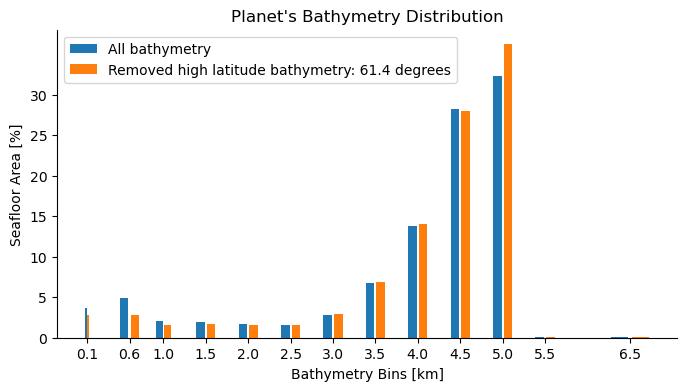

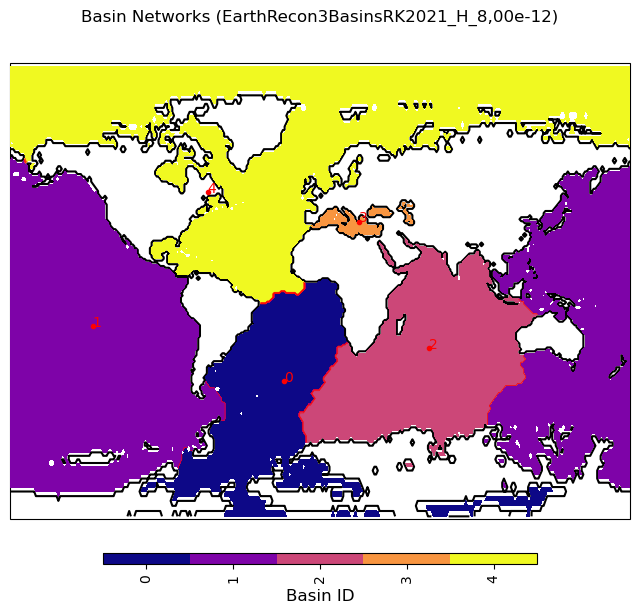

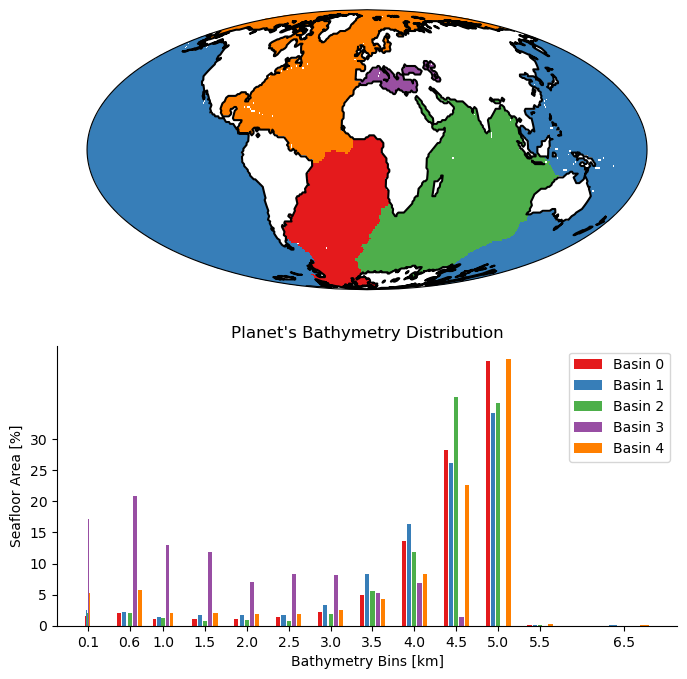

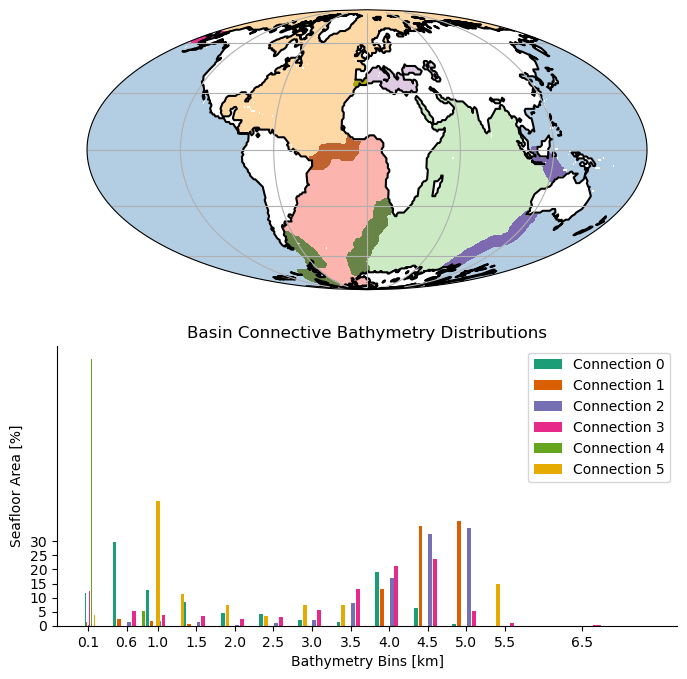

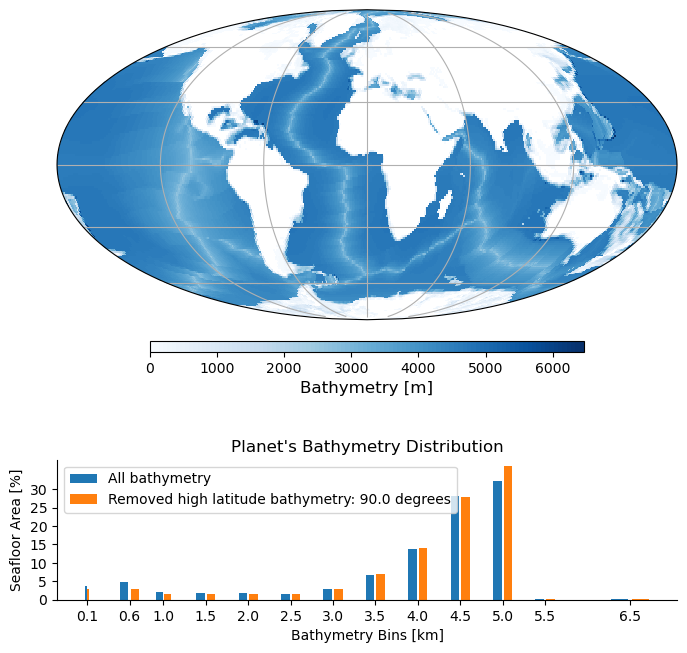

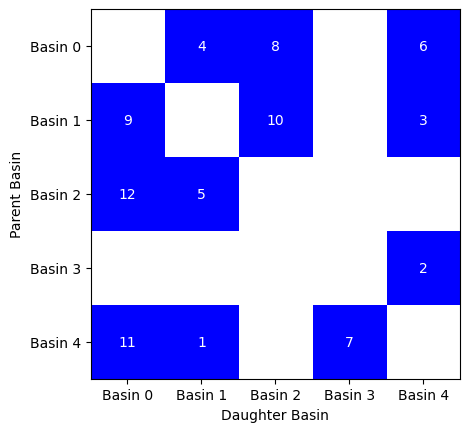

Next merge basin 0 with basin 2
merge basin 3 with basin 4
merge basin 1 with basin 2


In [1]:
#####################
###### Imports ######
#####################
import ExoCcycle as EC

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colors

import numpy as np
import copy as cp
import os

from scipy.stats import rankdata

####################################
###### Make basin definitions ######
####################################
# Import necessary libraries

# Define an input directory dictionary containing all necessary
# directories for the bathymetry reconstruction and analysis.
directories = {"paleoDEMs":"/home/bogumil/Documents/data/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2",
               "oceanLith":"/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF",
               "etopo":"//home/bogumil/Documents/data/topo"};
## Notes on name convection of paleoDEMs and oceanLith files.
## paleoDEMs -> [prefix]_[float/int]Ma.nc
## oceanLith -> [prefix]-[float/int].nc


# Create bathymetry object for reconstructing past Earth bathymetry 
EarthReconBathy = EC.Bathymetry.BathyRecon(directories)

# Set thermal subsidence model and parameters for Rosas and Korenaga (2021)
#thermalSubParameters = {'type':"RK2021", 'H':2.1e-12, 'MORDepthkm':2.5}
#thermalSubParameters = {'type':"RK2021", 'H':4.8e-12, 'MORDepthkm':2.5}
thermalSubParameters = {'type':"RK2021", 'H':8.0e-12, 'MORDepthkm':2.5}
EarthReconBathy.setThermalMethod(thermalSubParameters, verbose=True)

# Reconstruction past Earth bathymetry at 0 and with a resolution of 1 degree.
testAgest = 0
testAgeend = 0; # Needs to be smaller or equal to age testAgest.
EarthReconBathy.run(startMa=testAgest,
                    endMa=testAgeend,
                    deltaMyr=5,
                    resolution=1,
                    maxBasinCnt=5)


################################
####### Make rank matrix #######
################################
data = np.random.rand(10, 10) * 20
data = np.flipud(cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight).T)
tracker = np.flipud(cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight).T)
rank = cp.deepcopy(data);
for i in range(np.size(rank)):
    rank[tracker==np.max(tracker)] = len(tracker[tracker!=0]);
    tracker[tracker==np.max(tracker)] = 0;
    if len(tracker[tracker!=0])==0:
        break;
    #print(len(tracker[tracker!=0]))
rank = np.flipud(rank);

# create discrete colormap
cmap = colors.ListedColormap(['white', 'blue'])
bounds = [0,1,1e14]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig, ax = plt.subplots()
ax.imshow(data, cmap=cmap, norm=norm)

# draw gridlines
#ax.grid(which='major', axis='both', linestyle='-', color='k', linewidth=2)
plt.xlim([-.5, EarthReconBathy.basins.basinCnt-0.5])
plt.ylim([-.5, EarthReconBathy.basins.basinCnt-0.5])

labels = ["Basin {}".format(i) for i in np.arange(EarthReconBathy.basins.basinCnt)]
ax.set_xticks(np.arange(0, EarthReconBathy.basins.basinCnt, 1), labels=labels);
ax.set_yticks(np.arange(0, EarthReconBathy.basins.basinCnt, 1), labels=labels[::-1]);

plt.xlabel("Daughter Basin")
plt.ylabel("Parent Basin")

# Plot connection rank
xx, yy = np.meshgrid(np.arange(0, EarthReconBathy.basins.basinCnt), np.arange(0, EarthReconBathy.basins.basinCnt))
x_coords = xx.flatten()
y_coords = np.flip(yy).flatten()
values = rank.flatten()

# Create the figure and axes object
#fig, ax = plt.subplots()

# Plot the values as text, centered at the coordinates
for x, y, value in zip(x_coords, y_coords, values):
    ax.text(x, y, str(int(value)), ha='center', va='center', color='w')

# Adjust plot limits and add labels
#ax.set_xlim(0, 8)
#ax.set_ylim(0, 5)
#ax.set_xlabel("X-axis")
#ax.set_ylabel("Y-axis")
#ax.set_title("Values at Coordinates")

# Show the plot
plt.show()

import copy as cp
x = cp.deepcopy(EarthReconBathy.basins.basinConnectionWeight);
cnt = 0
while (x >0).any():
    idx = np.argwhere(x == np.nanmax(x))[0]
    if cnt ==0:
        print("Next merge basin {0} with basin {1}".format(idx[0],idx[1]))
    else:
        print("merge basin {0} with basin {1}".format(idx[0],idx[1]))
    x[idx]=0
    cnt+=1;




# Making synth bathymetry with different internal heat production

The main structure of this bathymetry uses Rosas and Korenaga (2021) to predict seafloor depth as a function of seafloor age. However, we should think about applying a correction term to isostatically compensate 1) ocean water loading and 2) different lithosphere packages with different degrees of partial melting and residum. Note that a correction term might not be possible to apply if there are non linearities. 

In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import os
import copy as cp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# Conversion
Ma2s = (1e6)*365*24*60*60;

# Defined values
alpha = 3e-5; # Thermal expansivity [1/K]
deltaT = 1350; # Mantle potential temperature [K]
d = 2900e3; # Mantle thickness [m]
rhoM = 3300; # Surface mantle density [kg/m3]
rhoW = 1000; # Density of water [kg/m3]
rho0 = 4000; # Reference density [kg/m3]
kappa = 1e-6; # Thermal diffusivity [m2/s]
K = 4; # Thermal conductivity [W/m/K]

# Viscosity [Pa s]
# Asthenospheric viscosity with exponential temperature-dependent viscosity in upper mantle
# Note: for tstar, we should only need temperature dependence in upper mantle? (fig. 2e)
nua0 = 3*1e19; # Asthenospheric viscosity [Pa s], influences F(u,T)

# Teperature profile [K], cooling of a 2D half-space
T = np.erf(...)

# Funtional calculation
F = intergal0_inf( (4*(nu-nua0)**3/u_star)*(dT_star/d_nu)*d_nu )

# Determining the onset of convection with eq. 24 (Korenaga and Jordan 2003, Physics of
# multiscale convection in Earth’s mantle: Onset of sublithospheric convection).
# F:    Functional related to total bouyancy density and width of bouyancy distribution
#       viscosity and temperature profile dependent F(u_star,T_star)
# Rac:  Critical Rayleigh number
# Ra:   Rayleigh number
ts = ( 4/(F*np.pi**2) * (Rac/Ra) )**(2/3)

# Calculation of Non-dimensionalized heating parameter (H*, Hs)
H = np.array([2.1, 3.2, 4.8, 6.4, 8])
Hs = (rho0*d**2/(K*deltaT)) * H


# Emperical scaling law for seafloor subsidence throughout 500 Myr (Rosas and Korenaga 2021)
# ws:  Seafloor subsidence from half space cooling with radiogenic heating
# whs: Seafloor subsidence from half space cooling with no radiogenic heating
# H*:   Non-dimensionalized heating parameter
# a1:   slope for linear relation between H* in the conductive phase        0.001 [1/s^(1/2)]
# a2:   slope for linear relation between H* in the convection phase        0.0228 [-]
# b2:   intercept for linear relation between H* in the conductive phase    0.0452 [-]
# Hs:   H* (Non-dimensionalized heating parameter)                          [varies] [-]
# tc:   Time of onset of convection                                         ... [s]
# ti:   Age of seafloor                                                     [varies] [s]
# tmax: Maximum age of seafloor                                             500 Myr [s]    




# whs: Seafloor subsidence from half space cooling with no radiogenic heating [m]
# Notes: The Rosas and Korenaga (2021) paper includes d (thickness of mantle) in
# the calculation of whs, however, this produces incorrect seafloor depths and might
# have been accidentally added to eq. 2 of the paper. Here we remove d to recover
# a realistic seafloor depth. 
# alpha:  Thermal expansivity             3e-5 1/K
# deltaT: Mantle potential temperature    1350 K (at present)
# d:      Mantle thickness                2900e3 m
# rhoM:   Surface mantle density          3300 kg/m3
# rhoW:   Density of water                1000 kg/m3
# kappa:  Thermal diffusivity             1e-6 m2/s
# tau:    Age of lithosphere              [free parameter] s
alpha = 3e-5
deltaT = 1350
d = 2900e3
rhoM = 3300
rhoW = 1000
kappa = 1e-6
tau = Ma2s*np.linspace(0,500,1000); 

whs = 2*(alpha*deltaT*( rhoM / (rhoM-rhoW) )) * ( (kappa * tau) / np.pi )**(1/2)



plt.plot((tau/Ma2s)**(1/2), whs);



# Parameter sets: 

In [ ]:
# Import necessary libraries
import ExoCcycle as EC
import os
import copy as cp
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


# Conversion
Ma2s = (1e6)*365*24*60*60;


# Fuctions for seafloor subsidence from Rosas and Korenaga (2021)
def whs(alpha, deltaT, rhoM, rhoW, kappa, age):
    return 2*(alpha*deltaT*( rhoM / (rhoM-rhoW) )) * ( (kappa * age) / np.pi )**(1/2);

def ws(whs, a1, a2, b2, ti, tmax, tstar, Hstar, age):
    
    # Conductive dominated
    whs[age<tstar] = whs[age<tstar]*(1 - a1*Hstar*(np.sqrt(age[age<tstar])-np.sqrt(ti)) )
    # Convection dominated
    whs[age>=tstar]  = whs[age>=tstar]*(1 - a1*Hstar*(np.sqrt(tstar)-np.sqrt(ti)) +\
                                       (Hstar*(a1*(np.sqrt(tstar)-np.sqrt(ti))-a2)-b2)*\
                                       (np.sqrt(age[age>=tstar])-np.sqrt(tstar))/\
                                       (np.sqrt(tmax)-np.sqrt(tstar)))
    
    return whs

# Fuction for seafloor subsidence from Crosby and Mckensie (2009)  
def CM2009(age, MORdepth=2652):
    
    depth = cp.deepcopy(age)
    
    depth[age<=75] = MORdepth + 324*np.sqrt(age[age<=75]);
    depth[(age>75)&(age<=160)] = (2376+MORdepth) + 5.26*age[(age>75)&(age<=160)] - 250*np.sin((age[(age>75)&(age<=160)]-75)/30);
    depth[age>160] = (3098+MORdepth);
    
    return depth

parameters = {}
parameters['set1'] = {}


# a1:     Slope for linear relation between H* in the conductive phase        0.0001 [1/s^(1/2)]
# a2:     Slope for linear relation between H* in the convection phase        0.0228 [-]
# b2:     Intercept for linear relation between H* in the conductive phase    0.0452 [-]
# tmax:   Maximum age of seafloor                                             500 Myr [s]    
# ti:     Age of seafloor                                                     [varies] from input  [s]
# rhoW:   Density of water                                                    1000 kg/m3
# rhoM:   Surface mantle density                                              3300 kg/m3
# rho0:   Reference density                                                   4000 [kg/m3]
# d:      Thickness of manle                                                  2900e3 [m]
# kappa:  Thermal conductivity                                                4 [W/m/K]
# alpha:  Thermal expansivity                                                 1e-6 [1/K]
# deltaT: Mantle potential temperature                                        1350 [K]
# nu0:    Reference viscosity                                                 1.3e20 [Pa s]
# Hstar:  H* (Non-dimensionalized heating parameter)                          [varies] Taken from figure 2a (Rosas and Korenaga 2021) [-]
# tstar:  Time of onset of convection                                         [varies] Digitized from figure 2a (Rosas and Korenaga 2021) [s]

# All parameters are taken from Rosas and Korenaga (2021)
parameters['set1']['a1'] = 0.001;
parameters['set1']['a2'] = 0.0228;
parameters['set1']['b2'] = 0.0452;
parameters['set1']['tmax'] = 500*Ma2s;
parameters['set1']['ti'] = (2.5**2)*Ma2s;
parameters['set1']['rhoW'] = 1000; # Surface mantle density [kg/m3]
parameters['set1']['rhoM'] = 3300; # Density of water [kg/m3]

parameters['set1']['rho0'] = 4000;   # Reference density [kg/m3]
parameters['set1']['d'] = 2900e3;    # Thickness of manle [m]
parameters['set1']['K'] = 4;         # Thermal conductivity [W/m/K]
parameters['set1']['kappa'] = 1e-6; # Thermal diffusivity [m2/s]
parameters['set1']['alpha'] = 3e-5;  # Thermal expansivity [1/K]
parameters['set1']['deltaT'] = 1350; # Mantle potential temperature [K]

parameters['set1']['nu0'] = 1.3e20; # [Pa s]
parameters['set1']['H'] = np.array([2.1, 3.2, 4.8, 6.4, 8])*1e-12; # [W/m/K]
parameters['set1']['Hstar'] = (parameters['set1']['rho0']*parameters['set1']['d']**2/(parameters['set1']['K']*parameters['set1']['deltaT'])) * parameters['set1']['H'];

# Digitized from figure 2a (Rosas and Korenaga 2021)
parameters['set1']['tstar'] = (np.array([16.966824644549764,
                                        16.303317535545023,
                                        15.734597156398102,
                                        15.165876777251183,
                                        14.786729857819903])**2)*Ma2s; # [s]

parameters['set1']['age'] = np.linspace(0,500,1000)*Ma2s; # [s]


fig, axes = plt.subplots(2,1)

colors = ['b','c','g','y','r'];
for i in range(len(parameters['set1']['tstar'])):    
    # Half space cooling
    #plt.sca(axes[0])
    whsi = whs(parameters['set1']['alpha'],
               parameters['set1']['deltaT'],
               parameters['set1']['rhoM'],
               parameters['set1']['rhoW'],
               parameters['set1']['kappa'],
               parameters['set1']['age'])
    #plt.plot((parameters['set1']['age']/Ma2s)**(1/2), whsi*1e-3);

    # Half space cooling with small scale convection
    plt.sca(axes[0])
    Ma2s_test = Ma2s;
    wsi  = ws(cp.deepcopy(whsi),
              parameters['set1']['a1'],
              parameters['set1']['a2'],
              parameters['set1']['b2'],
              parameters['set1']['ti']/Ma2s_test,
              parameters['set1']['tmax']/Ma2s_test,
              parameters['set1']['tstar'][i]/Ma2s_test,
              parameters['set1']['Hstar'][i],
              parameters['set1']['age']/Ma2s_test);
    
    plt.plot((parameters['set1']['age']/Ma2s)**(1/2),
             wsi*1e-3,
             colors[i]);
    plt.plot((parameters['set1']['tstar'][i]/Ma2s)**(1/2),
             (1e-3)*wsi[ np.abs(parameters['set1']['age']-parameters['set1']['tstar'][i]) == np.min(np.abs(parameters['set1']['age']-parameters['set1']['tstar'][i])) ],
             'o'+colors[i])
    if i==0:
        plt.plot((parameters['set1']['age']/Ma2s)**(1/2),
                 whsi*1e-3,
                 'k');
        plt.plot((parameters['set1']['age']/Ma2s)**(1/2),
                 CM2009(parameters['set1']['age']/Ma2s, MORdepth=0)*1e-3,
                 '--k');
        
        
    # Half space cooling with small scale convection
    plt.sca(axes[1])
    plt.plot((parameters['set1']['age']/Ma2s),
             wsi*1e-3,
             colors[i]);
    plt.plot((parameters['set1']['tstar'][i]/Ma2s),
             (1e-3)*wsi[ np.abs(parameters['set1']['age']-parameters['set1']['tstar'][i]) == np.min(np.abs(parameters['set1']['age']-parameters['set1']['tstar'][i])) ],
             'o'+colors[i])
    if i==0:
        plt.plot((parameters['set1']['age']/Ma2s),
                 whsi*1e-3,
                 'k');
        plt.plot((parameters['set1']['age']/Ma2s),
                 CM2009(parameters['set1']['age']/Ma2s, MORdepth=0)*1e-3,
                 '--k');

        
# Plot general
fig.supylabel(r'Subsidence w.r.t. MOR depth $[km]$')
minmaxAge   = [0,500]
minmaxDepth = [-2,8];

# Top figure
plt.sca(axes[0])
plt.ylim([minmaxDepth[0],minmaxDepth[1]])
plt.xlim([minmaxAge[0]**(1/2),minmaxAge[1]**(1/2)])
axes[0].invert_yaxis()
axes[0].tick_params(axis='x', top=True, labeltop=True, bottom=False, labelbottom=False)
axes[0].set_xlabel(r'Age $[Myr]^{1/2}$')    
axes[0].xaxis.set_label_position('top') 
axes[0].spines['bottom'].set_visible(False)
axes[0].spines['right'].set_visible(False)



# Bottom figure
plt.sca(axes[1])
plt.ylim([minmaxDepth[0],minmaxDepth[1]])
plt.xlim([minmaxAge[0],minmaxAge[1]])
axes[1].invert_yaxis()
plt.xlabel(r'Age $[Myr]$');
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)




In [ ]:
# Veriation of theta parameter (Rosas and Korenaga 2021)
E = 300e3;  # Acivation energy [J/mol]
R =  8.314; # Universial gas constant [J/mol·K]
Ts = 273;   # Surface temperature[K]
deltaTv = np.linspace(1350, 1650, 1000);

theta = E*deltaTv/(R*(Ts+deltaTv)**2)



fig, axes = plt.subplots(1,1)

colors = ['b','c','g','y','r'];
plt.plot(
    deltaTv,
    theta,
    '--'+colors[0]);


### Testing utils.eaNode() class

In [10]:
#### Import necessary libraries
import ExoCcycle as EC

inputs = {}
inputs['dataGrid'] = "/home/bogumil/Documents/data/Muller_etal_2019_Tectonics_v2.0_netCDF/Muller_etal_2019_Tectonics_v2.0_AgeGrid-0.nc"
inputs["resolution"] = 1;

eaNodes = EC.utils.eaNodes(inputs)
eaNodes.makegrid(plotq=0)

eaNodes.interp2IrregularGrid(path=inputs['dataGrid'],name='Age')



#eaNodes.interpIrregularGrid(plotq=2)

import numpy as np







Duplicates removed: 1306
Grid saved to: EA_Nodes_1_xyz.txt


grdtrack [WARNING]: Some input points were outside the grid domain(s).
sh: 1: temp.txt: not found


## Testing utils.BasinsEA()

In [1]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np


# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=False)


#basins.eaPoint.connectionNodeIDs


/home/bogumil/anaconda3/envs/ExoCcycle/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6445: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt


100%|██████████████████████████████████████| 301/301 [00:00<00:00, 41783.40it/s]


/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6448: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt


100%|██████████████████████████████████████| 301/301 [00:00<00:00, 41747.48it/s]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  21  22  23  32  38  39  40  43  47  48  52  56  60  64  65  66  67
  68  69  72  77  82  83  88  89  90  93  94  97  98 102 103 108 118 124
 125 126 128 129 130 134 135 140 142 143 145 147 148 151 152 154 157 158
 159 160 164 165 170 199 200 205 210 217 218 219 220 221 222 224 225 230
 231 234 235 236 243 247 248 251 252 255 257 291 292 295 296 297 298 300] nodes have only 3 edges shared with other nodes. This should occur for 8 nodes.
[] nodes have 5 edges shared with other nodes. This should not occur for any nodes.


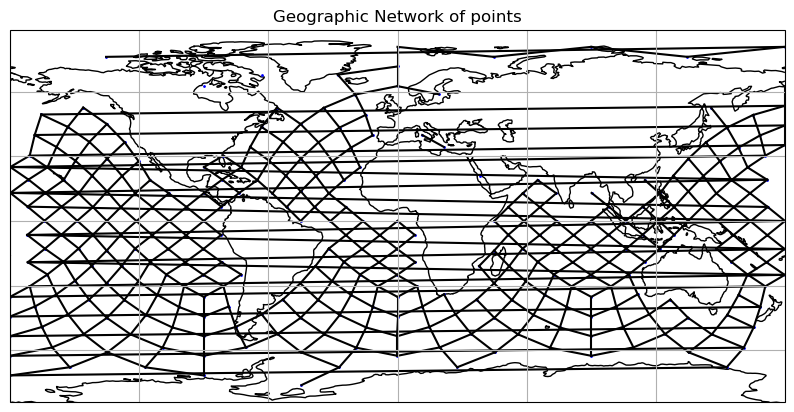

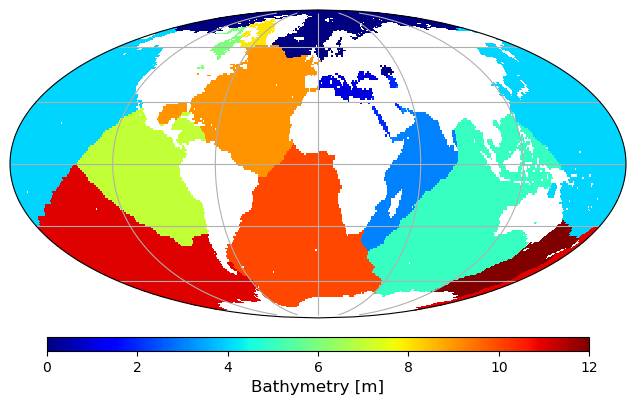

In [7]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 13,
                    method = "Girvan-Newman",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=True)



basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)





/home/bogumil/Documents/External_fids/ExoCcycle-workspace/ExoCcycle/utils.py:6448: RuntimeWarning: invalid value encountered in sqrt
  c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
sh: 1: temp.txt: not found


Duplicates removed: 154
Grid saved to: EA_Nodes_10.0_xyz.txt


100%|██████████████████████████████████████| 301/301 [00:00<00:00, 41450.05it/s]


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  19  21  22  23  32  38  39  40  43  47  48  52  56  60  64  65  66  67
  68  69  72  77  82  83  88  89  90  93  94  97  98 102 103 108 118 124
 125 126 128 129 130 134 135 140 142 143 145 147 148 151 152 154 157 158
 159 160 164 165 170 199 200 205 210 217 218 219 220 221 222 224 225 230
 231 234 235 236 243 247 248 251 252 255 257 291 292 295 296 297 298 300] nodes have only 3 edges shared with other nodes. This should occur for 8 nodes.
[] nodes have 5 edges shared with other nodes. This should not occur for any nodes.


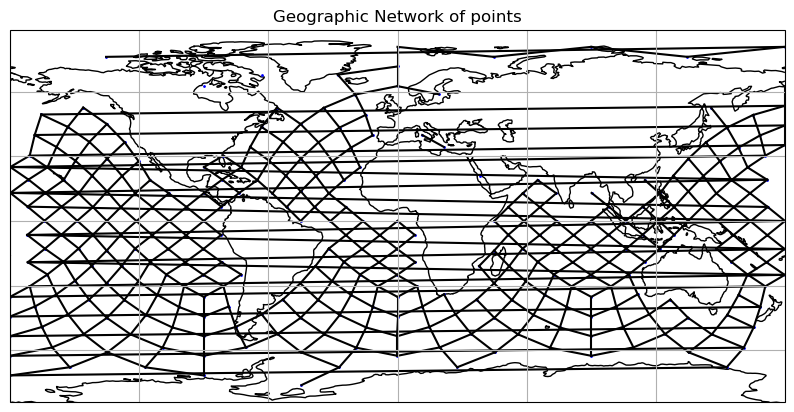

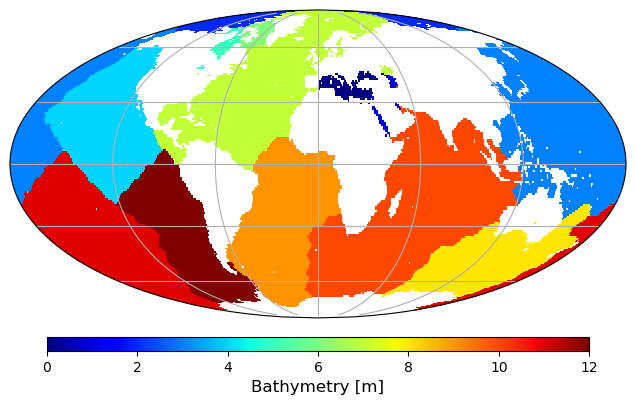

In [6]:
# Import necessary libraries
import ExoCcycle as EC
import os
import matplotlib as mpl
import numpy as np
import networkx as nx



# Initial basin definition class

body = ["Earth", "Mars", "Venus", "Moon"]
body = body[0]
basins = EC.utils.BasinsEA(dataDir=os.getcwd()+"/bathymetries/{}".format(body),
                         filename="{}_resampled_1deg.nc".format(body),
                         body=body);

# Define basins based on user input boundaries
basins.defineBasins(minBasinCnt = 3,
                    method = "Louvain",
                    reducedRes={"on":True,"factor":10},
                    read=False,
                    write=True,
                    verbose=True)



basins.interp2regularGrid(mask=True)


EC.utils.plotGlobal(basins.lat, basins.lon, basins.BasinIDA,
                    outputDir = os.getcwd(),
                    fidName = "plotGlobal.png",
                    cmapOpts={"cmap":"jet",
                              "cbar-title":"cbar-title",
                              "cbar-range":[0,np.nanmax(basins.BasinIDA)]},
                    pltOpts={"valueType": "Bathymetry",
                             "valueUnits": "m",
                             "plotTitle":"",
                             "plotZeroContour":False},
                    savePNG=False,
                    saveSVG=False)



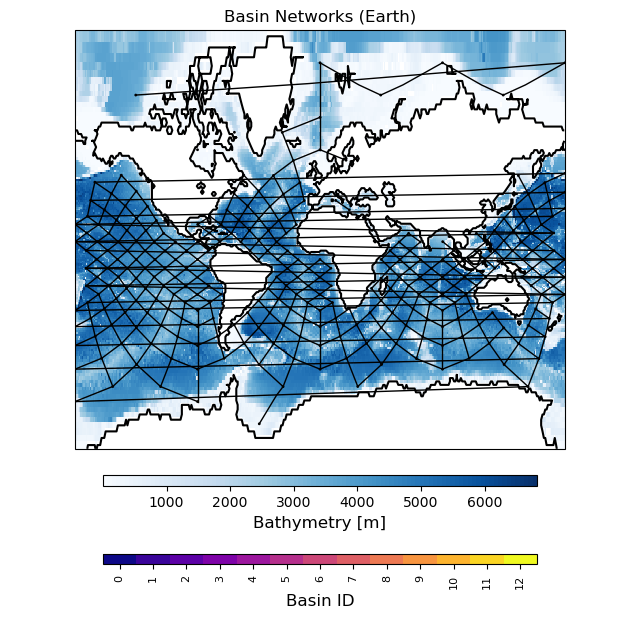

In [2]:


blues_cm = mpl.colormaps['Blues'].resampled(100)
basins.visualizeCommunities( cmapOpts={"cmap":blues_cm,
                                       "cbar-title":"cbar-title",
                                       "cbar-range":[np.nanmin(np.nanmin(basins.bathymetry)),
                                                     np.nanmean(basins.bathymetry)+2*np.nanstd(basins.bathymetry)]},
                             pltOpts={"valueType": "Bathymetry",
                                      "valueUnits": "m",
                                      "plotTitle":"{}".format(basins.body),
                                      "plotZeroContour":True,
                                      "nodesize":1,
                                      "connectorlinewidth":1,
                                      "projection":"Mercator"},
                             draw={"nodes":True,
                                   "connectors":True,
                                   "bathymetry":True,
                                   "coastlines":True,
                                   "gridlines":False,
                                   "nodes-contour":False},
                             saveSVG=False,
                             savePNG=False)

#basins.eaPoint.depth





# Determining the appropriate node edge weight formulation: product of (inverse node distance) & (absolute value inverse property)  

/tmp/ipykernel_10981/3142365261.py:33: RuntimeWarning: divide by zero encountered in divide
  propertyInv = 1/np.abs((values1-values2)/range1)


Plot on left: shows background (values near 1) and variations (values near 0)
Plot on left: higher values (1) show how values there is a strong connection where there is little variation in values.
Plot on right: shows variations for smaller (values near 0.005) and large (values near .01) circle.
Plot on right: higher values for the larger circle show how the larger circle is more similar (strongly connected) to the background than the smaller circle is to the larger circle


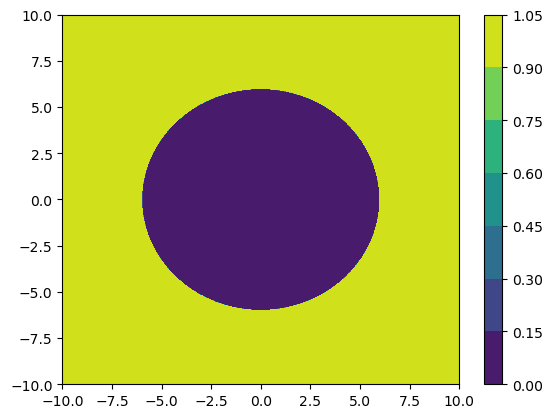

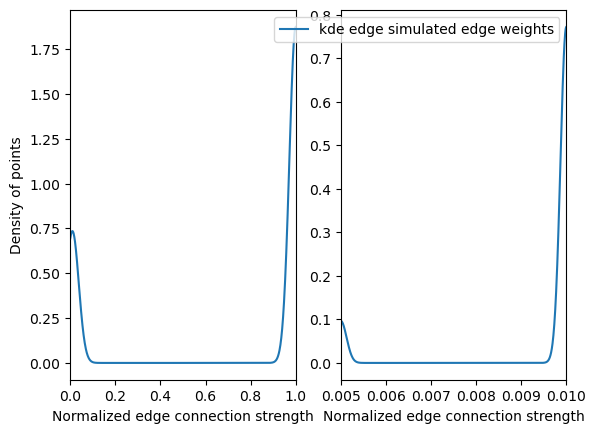

In [48]:
# Testing

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


# Define space
x = np.linspace(-10,10,1001);
y = np.linspace(-10,10,1001);
XX, YY = np.meshgrid(x, y)

# Create two arrays, where values1-values2 shows largest variations in decending order
# 1. between values1/values1 in 2 radius circle [magnitude 600]
# 2. between values1/values1 in hollow circle with inner/outer radii 2/6. [magnitude 500]
# 3. between values1/values1 outside of circle with radius 6. [magnitude 0]
values1 = np.zeros(np.shape(XX))
values2 = np.zeros(np.shape(XX))
values1[np.sqrt(XX**2 + YY**2)<6] = 100
values2[np.sqrt(XX**2 + YY**2)<2] = -100

# Calculate inverse difference for each location and normalize
# For areas where values1=values2, we define propertyInv=1.
# After this we get the following
# 1. between values1/values1 in 2 radius circle [magnitude third highest]
# 2. between values1/values1 in hollow circle with inner/outer radii 2/6. [magnitude second highest]
# 3. between values1/values1 outside of circle with radius 6. [magnitude highest]
min1 = np.min([np.min(values1),np.min(values2)])
max1 = np.max([np.max(values1),np.max(values2)])
range1 = max1-min1;

propertyInv = 1/np.abs((values1-values2)/range1)
propertyInv[np.isinf(propertyInv)] = range1
propertyInv /= range1


# Plot
plt.figure();
plt.contourf(XX, YY, propertyInv);
plt.colorbar();

fig, axes = plt.subplots(1,2);
plt.sca(axes[0])
kde1 = stats.gaussian_kde(propertyInv.flatten())
plt.plot(np.linspace(0, 1, 1000),
         100*kde1(np.linspace(0, 1, 1000))/np.sum(kde1(np.linspace(0, 1, 1000))),
         label="kde edge simulated edge weights");
plt.xlim([0,1])
plt.ylabel('Density of points')
plt.xlabel('Normalized edge connection strength')

plt.sca(axes[1])
limitedPropertyInv = propertyInv[propertyInv!=1]
kde2 = stats.gaussian_kde(limitedPropertyInv.flatten())
xvalues = np.linspace(np.min(limitedPropertyInv), np.max(limitedPropertyInv), 1000)
plt.plot(xvalues,
         100*(len(limitedPropertyInv)/len(propertyInv.flatten()))*kde2(xvalues)/np.sum(kde2(xvalues)),
         label="kde edge simulated edge weights");
plt.xlim([np.min(xvalues), np.max(xvalues)])

plt.xlabel('Normalized edge connection strength')
#plt.ylabel('Density of points')
plt.legend()

print("Plot on left: shows background (values near 1) and variations (values near 0)")
print("Plot on left: higher values (1) show how values there is a strong connection where there is little variation in values.")
print("Plot on right: shows variations for smaller (values near 0.005) and large (values near .01) circle.")
print("Plot on right: higher values for the larger circle show how the larger circle is more similar (strongly connected) to the background than the smaller circle is to the larger circle")
